In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### DATASET OVERVIEW

In [3]:
data=pd.read_csv("C:\\Users\\sogex\\Downloads\\House_Pricing.csv",index_col=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [5]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.shape

(21613, 21)

In [7]:
data.head(3)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062


### DUPLICATE REMOVAL

In [9]:
duplicated_rows=data.duplicated()
duplicated_rows.sum()

0

In [10]:
data=data[~duplicated_rows]

In [11]:
data.shape

(21613, 21)

### HANDLING MISSING VALUES

In [13]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [14]:
num_df=data.select_dtypes(include="number")
cat_df=data.select_dtypes(include="object_")

In [15]:
print("numerical columns are:")
num_cols=num_df.columns.tolist()
print(num_cols)

numerical columns are:
['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [16]:
print("categorical columns are:")
cat_cols=cat_df.columns.tolist()
print(cat_cols)

categorical columns are:
['Date House was Sold', 'Waterfront View', 'No of Times Visited', 'Condition of the House']


<Axes: >

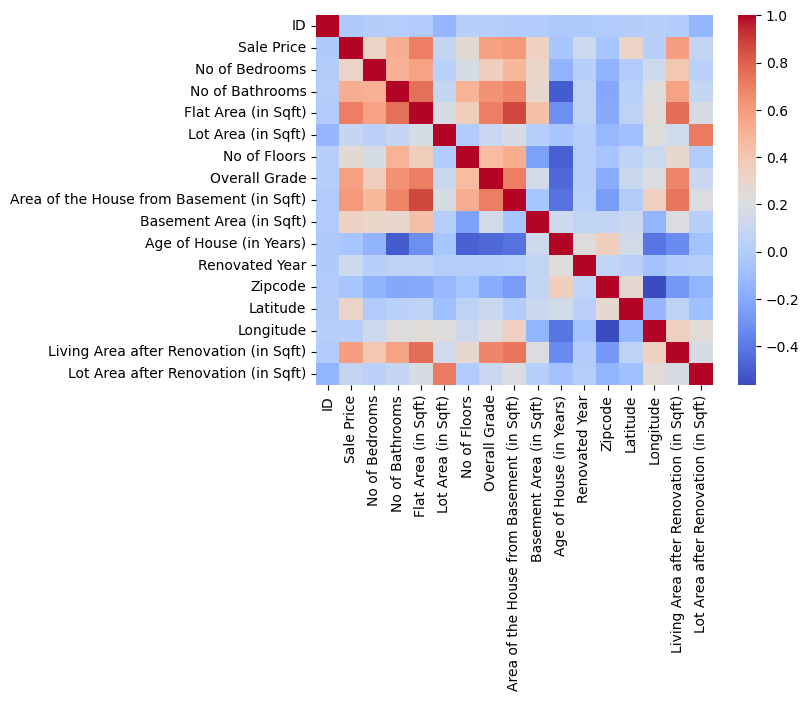

In [32]:
sns.heatmap(num_df.corr(),annot=False,cmap="coolwarm")

In [34]:
num_df.isna().sum()

ID                                           0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [36]:
num_df.dropna(subset=["Zipcode", "Latitude","Longitude","Living Area after Renovation (in Sqft)"],inplace=True)

In [38]:
num_df.isna().sum()

ID                                           0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

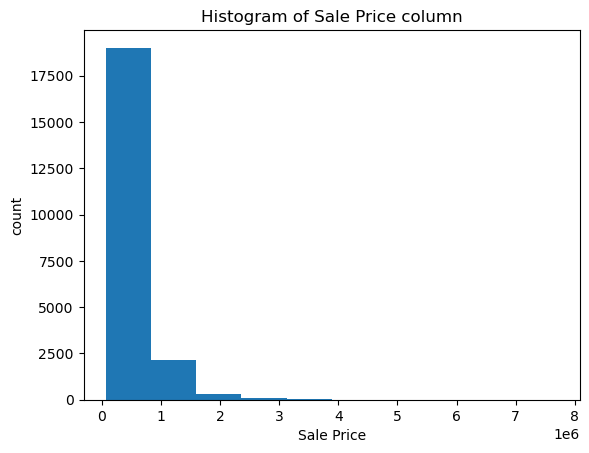

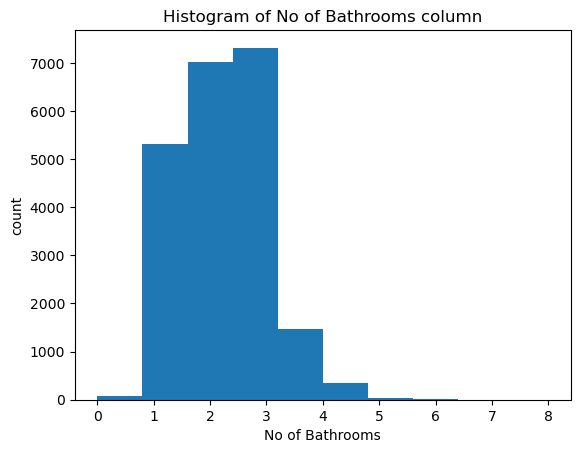

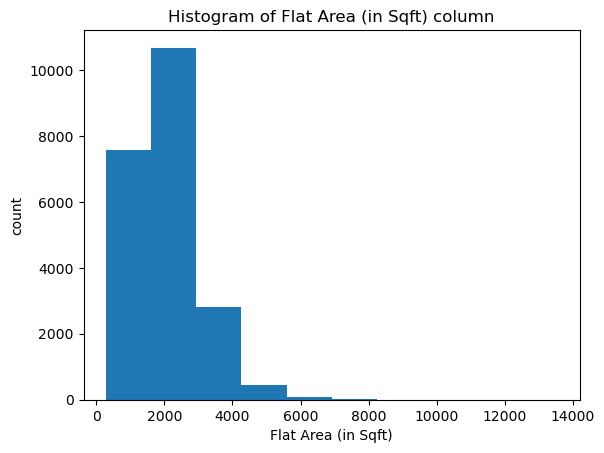

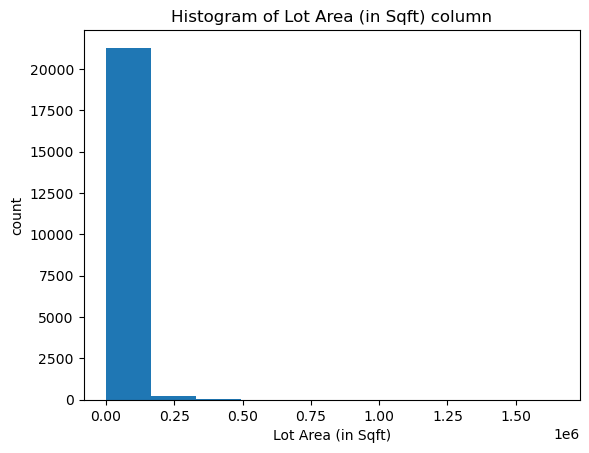

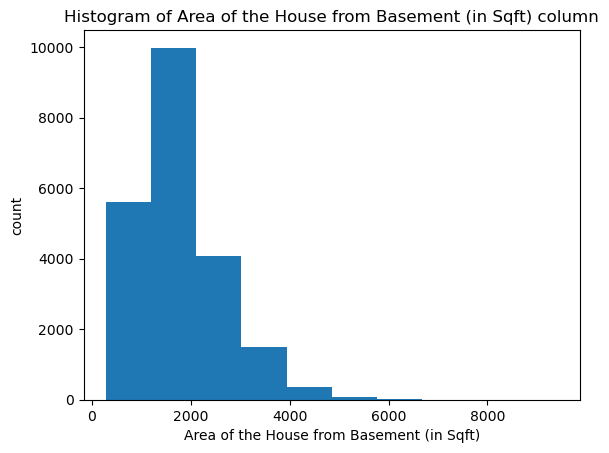

In [40]:
miss_col_list=["Sale Price","No of Bathrooms","Flat Area (in Sqft)","Lot Area (in Sqft)","Area of the House from Basement (in Sqft)"]
for col in miss_col_list:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [41]:
for col in miss_col_list:
    num_df[col]=num_df[col].fillna(num_df[col].median())

In [42]:
num_df.isna().sum()

ID                                           0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [46]:
cat_df.isna().sum()

Date House was Sold           0
Waterfront View               0
No of Times Visited       19489
Condition of the House        0
dtype: int64

In [48]:
cat_df.drop(columns=["No of Times Visited"], inplace=True)

In [50]:
cat_df.isna().sum()

Date House was Sold       0
Waterfront View           0
Condition of the House    0
dtype: int64

### SCALING NUMERICAL VARIABLES (excluding the target variable SalePrice)

In [53]:
scale_num_df=['ID', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 
              'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 
              'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']
for col in scale_num_df:
    num_df[col]=(num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())



### ENCODING CATEGORICAL VARIABLES

In [56]:
cat_df['Waterfront View'].value_counts()

Waterfront View
No     21450
Yes      163
Name: count, dtype: int64

In [58]:
cat_df['Condition of the House'].value_counts()

Condition of the House
Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

In [60]:
cat_df['Waterfront View'] = cat_df['Waterfront View'].map({'Yes': 1, 'No': 0})

In [62]:
condition_map = {
    'Fair': 1,
    'Good': 2,
    'Excellent': 3,
    'Okay': 4,
    'Bad': 5
}
cat_df['Condition of the House'] = cat_df['Condition of the House'].map(condition_map)

In [64]:
import numpy as np

cat_df['Date House was Sold'] = pd.to_datetime(cat_df['Date House was Sold'], format='%d %B %Y')

cat_df['Year_Sold'] = cat_df['Date House was Sold'].dt.year
cat_df['Month_Sold'] = cat_df['Date House was Sold'].dt.month
cat_df['Day_Sold'] = cat_df['Date House was Sold'].dt.day
cat_df['Day_of_Week'] = cat_df['Date House was Sold'].dt.dayofweek
cat_df['Quarter_Sold'] = cat_df['Date House was Sold'].dt.quarter

cat_df.drop('Date House was Sold', axis=1, inplace=True)

In [66]:
cat_df

,Waterfront View,Condition of the House,Year_Sold,Month_Sold,Day_Sold,Day_of_Week,Quarter_Sold
0,0,1,2017,10,14,5,4
1,0,1,2017,12,14,3,4
2,0,1,2016,2,15,0,1
3,0,3,2017,12,14,3,4
4,0,1,2016,2,15,0,1
...,...,...,...,...,...,...,...
21608,0,1,2017,5,14,6,2
21609,0,1,2016,2,15,0,1
21610,0,1,2017,6,14,2,2
21611,0,1,2016,1,15,4,1


### OUTLIER REMOVAL

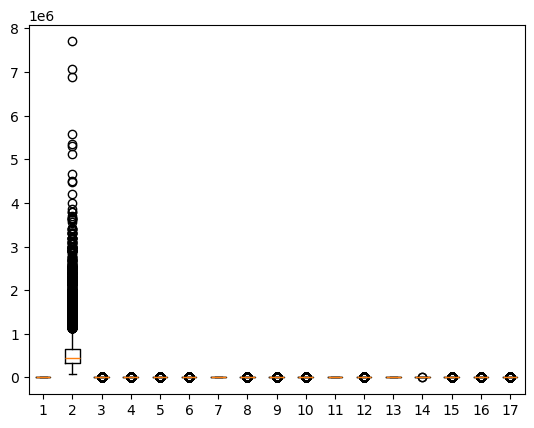

In [69]:
plt.boxplot(num_df)
plt.show()

In [70]:
def remove_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

for col in num_cols:
    num_df[col]=remove_outliers(num_df,col)

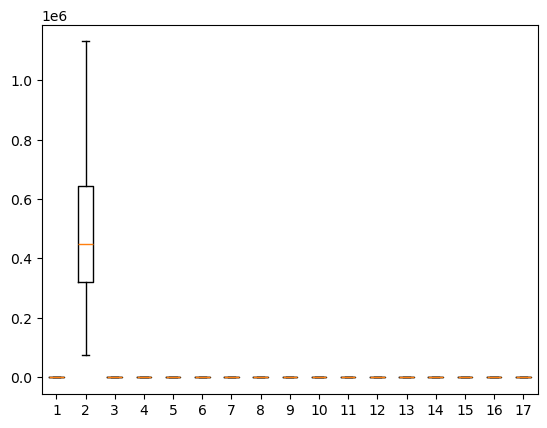

In [73]:
plt.boxplot(num_df)
plt.show()

In [75]:
num_df.isna().sum()

ID                                           0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [77]:
cat_df.isna().sum()

Waterfront View           0
Condition of the House    0
Year_Sold                 0
Month_Sold                0
Day_Sold                  0
Day_of_Week               0
Quarter_Sold              0
dtype: int64

In [79]:
data=pd.concat([num_df,cat_df],axis=1)
data.head(3)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,Condition of the House,Year_Sold,Month_Sold,Day_Sold,Day_of_Week,Quarter_Sold
0,0.720103,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0.666667,0.097588,0.000000,...,0.217608,0.161934,0.005742,0,1,2017,10,14,5,4
1,0.647853,538000.0,0.090909,0.28125,0.172075,0.004072,0.4,0.666667,0.206140,0.082988,...,0.166113,0.222165,0.008027,0,1,2017,12,14,3,4
2,0.568795,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0.555556,0.052632,0.000000,...,0.237542,0.399415,0.008513,0,1,2016,2,15,0,1


### TRAIN TEST SPLIT

In [82]:
y=data["Sale Price"]
X=data.drop("Sale Price",axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,Condition of the House,Year_Sold,Month_Sold,Day_Sold,Day_of_Week,Quarter_Sold
6329,0.261420,0.090909,0.18750,0.075472,0.004753,0.0,0.666667,0.080044,0.056017,0.504348,...,0.166944,0.235932,0.008901,0,1,2017,10,14,5,4
13477,0.082942,0.060606,0.25000,0.150189,0.011290,0.4,0.888889,0.218202,0.000000,0.217391,...,0.053156,0.280675,0.019423,0,1,2017,6,14,2,2
17618,0.391485,0.090909,0.28125,0.111698,0.004531,0.0,0.666667,0.116228,0.087137,0.339130,...,0.289867,0.249699,0.008298,0,2,2017,12,14,3,4
16974,0.153809,0.090909,0.31250,0.132075,0.002488,0.4,0.777778,0.191886,0.000000,0.200000,...,0.341362,0.315092,0.004421,0,1,2017,6,14,2,2
20872,0.793240,0.121212,0.43750,0.297358,0.003201,0.4,0.888889,0.339912,0.228216,0.078261,...,0.547342,0.562038,0.006488,0,1,2017,12,14,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11968,0.954066,0.121212,0.31250,0.131321,0.002050,0.2,0.666667,0.146930,0.082988,0.773913,...,0.148671,0.275512,0.003738,0,2,2017,6,14,2,2
21579,0.708173,0.090909,0.40625,0.108679,0.000429,0.4,0.888889,0.112939,0.085062,0.060870,...,0.124585,0.225607,0.001189,0,1,2017,5,14,6,2
5394,0.032434,0.060606,0.28125,0.122264,0.011290,0.0,0.666667,0.078947,0.186722,0.373913,...,0.411960,0.284116,0.019423,0,2,2016,5,15,6,2
864,0.417825,0.121212,0.31250,0.132830,0.004177,0.4,0.777778,0.192982,0.000000,0.217391,...,0.249169,0.284116,0.008350,0,1,2017,11,14,1,4
